Download the MNIST dataset and create a custom dataloader using torch.utils.data.Dataset, DataLoader.

Compare the loading performance of your scratch implemented data loader with the one provided by PyTorch across different batch sizes (128, 256, 512, 1024).

Plot a graph illustrating the relationship between batch size and loading time.

In [1]:
# pip install torch torchvision matplotlib


In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import time
import matplotlib.pyplot as plt


c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


verify this and write observations regarding this

Using downloaded and verified file: ./data\MNIST\raw\train-images-idx3-ubyte.gz
Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 139029.80it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:02<00:00, 677857.24it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



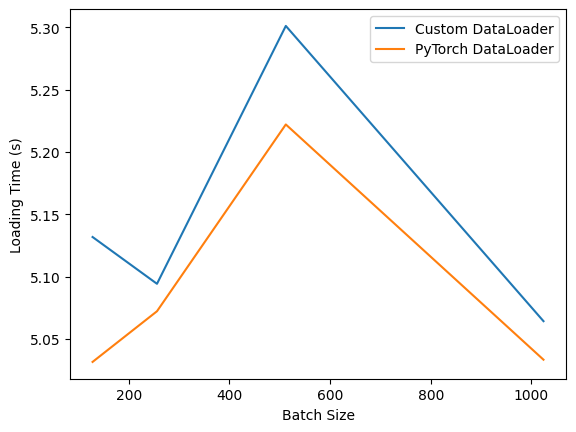

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt


class MNISTDataset(Dataset):
    def __init__(self, transform=None):
        self.data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image, label = self.data[index]
        return image, label

def measure_loading_time(dataloader, num_batches):
    start_time = time.time()
    for _ in range(num_batches):
        for data in dataloader:
            pass
    end_time = time.time()
    return (end_time - start_time) / num_batches

batch_sizes = [128, 256, 512, 1024]

custom_loader_times = []
pytorch_loader_times = []

for batch_size in batch_sizes:
    custom_dataset = MNISTDataset(transform=transforms.ToTensor())
    custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)
    custom_loading_time = measure_loading_time(custom_dataloader, 5)  # Measure for 5 batches
    custom_loader_times.append(custom_loading_time)

 
    pytorch_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
    pytorch_dataloader = DataLoader(pytorch_dataset, batch_size=batch_size, shuffle=True)
    pytorch_loading_time = measure_loading_time(pytorch_dataloader, 5)  # Measure for 5 batches
    pytorch_loader_times.append(pytorch_loading_time)

# Plot the results
plt.plot(batch_sizes, custom_loader_times, label='Custom DataLoader')
plt.plot(batch_sizes, pytorch_loader_times, label='PyTorch DataLoader')
plt.xlabel('Batch Size')
plt.ylabel('Loading Time (s)')
plt.legend()
plt.show()


##### Custom DataLoader takes more time to load the dataset for all the batch sizes 128, 256, 512, 1024
##### Hence, PyTorch DataLoader performs better in all the cases
##### Pytorch first has increasing time to load all the data atleast till 256 batch size, which decreases steeply after 256 ( which is similar for custom dataloader as well, except for the part where the 256 batch size takes lesser time as compared to 128 )


Epoch 1/60: Train Loss: 2.3025, Val Loss: 2.3025, Test Loss: 2.3025, Train Acc: 0.1122, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 2/60: Train Loss: 2.3025, Val Loss: 2.3024, Test Loss: 2.3024, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 3/60: Train Loss: 2.3024, Val Loss: 2.3024, Test Loss: 2.3024, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 4/60: Train Loss: 2.3023, Val Loss: 2.3023, Test Loss: 2.3023, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 5/60: Train Loss: 2.3023, Val Loss: 2.3022, Test Loss: 2.3022, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 6/60: Train Loss: 2.3022, Val Loss: 2.3022, Test Loss: 2.3022, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 7/60: Train Loss: 2.3021, Val Loss: 2.3021, Test Loss: 2.3021, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 8/60: Train Loss: 2.3021, Val Loss: 2.3020, Test Loss: 2.3020, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 9/60: Train Loss: 

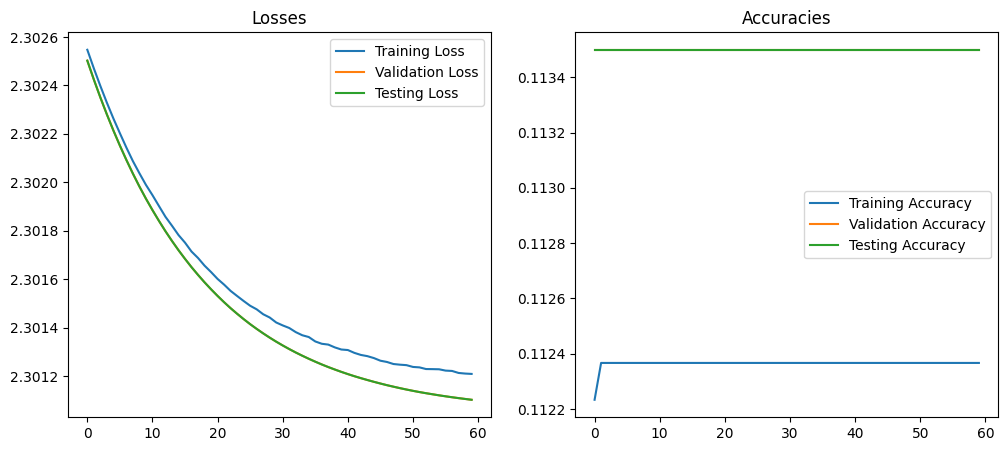

In [4]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# from torchvision import transforms
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt

# # Set the seed for reproducibility
# torch.manual_seed(42)

# # Define the Linear layer
# class Linear(nn.Module):
#     def __init__(self, in_features, out_features):
#         super(Linear, self).__init__()
#         self.weight = nn.Parameter(torch.randn(out_features, in_features) * 0.01)
#         self.bias = nn.Parameter(torch.zeros(out_features))

#     def forward(self, x):
#         return torch.matmul(x, self.weight.t()) + self.bias

# # Define the neural network architecture
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = Linear(28 * 28, 32)
#         self.relu1 = nn.ReLU()
#         self.fc2 = Linear(32, 32)
#         self.relu2 = nn.ReLU()
#         self.fc3 = Linear(32, 32)
#         self.relu3 = nn.ReLU()
#         self.fc4 = Linear(32, 32)
#         self.relu4 = nn.ReLU()
#         self.fc5 = Linear(32, 10)

#     def forward(self, x):
#         x = x.view(x.size(0), -1)
#         x = self.relu1(self.fc1(x))
#         x = self.relu2(self.fc2(x))
#         x = self.relu3(self.fc3(x))
#         x = self.relu4(self.fc4(x))
#         x = self.fc5(x)
#         return x

# # Load data using torchvision DataLoader
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# ### Loss and optimiser ek baar have to check
# # ----------------------------------------------------------------------------------------------------------------------------------
# # Instantiate the model, loss function, and optimizer
# model = NeuralNetwork()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.0003)

# # Training loop
# num_epochs = 60
# train_losses, val_losses, test_losses = [], [], []
# train_accuracies, val_accuracies, test_accuracies = [], [], []

# for epoch in range(num_epochs):
#     model.train()
#     total_loss, correct_train = 0, 0

#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         correct_train += (predicted == labels).sum().item()

#     train_loss = total_loss / len(train_loader)
#     train_accuracy = correct_train / len(train_loader.dataset)

#     # Validation
#     model.eval()
#     val_loss, correct_val = 0, 0

#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()
#             _, predicted = torch.max(outputs.data, 1)
#             correct_val += (predicted == labels).sum().item()

#     val_loss /= len(test_loader)
#     val_accuracy = correct_val / len(test_loader.dataset)

#     # Testing
#     model.eval()
#     test_loss, correct_test = 0, 0

#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             test_loss += loss.item()
#             _, predicted = torch.max(outputs.data, 1)
#             correct_test += (predicted == labels).sum().item()

#     test_loss /= len(test_loader)
#     test_accuracy = correct_test / len(test_loader.dataset)

#     # Store metrics for plotting
#     train_losses.append(train_loss)
#     val_losses.append(val_loss)
#     test_losses.append(test_loss)
#     train_accuracies.append(train_accuracy)
#     val_accuracies.append(val_accuracy)
#     test_accuracies.append(test_accuracy)

#     # Print progress
#     print(f"Epoch {epoch+1}/{num_epochs}: "
#           f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, "
#           f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

# # Plotting
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.plot(test_losses, label='Testing Loss')
# plt.legend()
# plt.title('Losses')

# plt.subplot(1, 2, 2)
# plt.plot(train_accuracies, label='Training Accuracy')
# plt.plot(val_accuracies, label='Validation Accuracy')
# plt.plot(test_accuracies, label='Testing Accuracy')
# plt.legend()
# plt.title('Accuracies')

# plt.show()


In [6]:
# print(train_losses)
# print(val_losses)
# print(test_losses)
# print(train_accuracies)
# print(val_accuracies)
# print(test_accuracies)


[2.30254714524568, 2.3024706067815264, 2.3023980680559237, 2.3023289431895275, 2.3022638462753946, 2.30220278315961, 2.3021434212544327, 2.3020874965928004, 2.302037454871481, 2.3019895182489587, 2.30194718192127, 2.301902176728889, 2.301857638969096, 2.3018208134657283, 2.3017824390041293, 2.301751106024297, 2.3017142927214533, 2.3016876739733765, 2.3016560710569434, 2.301629598206803, 2.301601222583226, 2.3015777777507105, 2.3015518625662015, 2.301530823270395, 2.301510206163565, 2.3014905828911103, 2.3014758553332104, 2.301455539426824, 2.3014420263294473, 2.301421489796913, 2.301409401619104, 2.301398800634372, 2.301381719646169, 2.3013688635978617, 2.301361442628954, 2.3013431893737075, 2.301333602303381, 2.301330216403709, 2.3013186345476586, 2.3013099376072508, 2.301307772014187, 2.3012960767949315, 2.301287544307424, 2.301282538279796, 2.3012745433778905, 2.3012636963492517, 2.301258526377078, 2.3012500632800528, 2.3012473397671793, 2.3012453866665807, 2.301237987811123, 2.3012

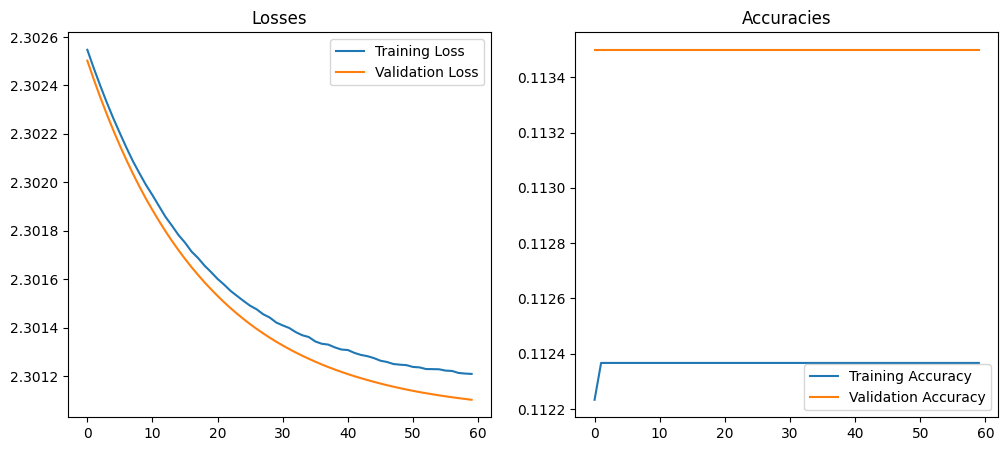

In [10]:
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.legend()
# plt.title('Losses')

# plt.subplot(1, 2, 2)
# plt.plot(train_accuracies, label='Training Accuracy')
# plt.plot(val_accuracies, label='Validation Accuracy')
# plt.legend()
# plt.title('Accuracies')

# plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
class Loss(nn.Module):
    def __init__(self):
        super(Loss, self).__init__()

    def forward(self, outputs, labels):
        softmax_outputs = torch.exp(outputs) / torch.exp(outputs).sum(dim=1, keepdim=True)
        loss = -torch.log(softmax_outputs[range(len(outputs)), labels]).mean()

        self.softmax_outputs = softmax_outputs
        self.labels = labels

        return loss

    def backward(self):
        grad_inputs = self.softmax_outputs.clone()
        grad_inputs[range(len(grad_inputs)), self.labels] -= 1
        grad_inputs /= len(self.labels)

        return grad_inputs


In [ ]:
class Activation:
    def forward(self, x):
        self.input = x
        return torch.max(x, torch.zeros_like(x))

    def backward(self, grad_output):
        grad_input = torch.where(self.input > 0, grad_output, torch.zeros_like(grad_output))
        return grad_input


In [ ]:
class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.weight = nn.Parameter(torch.randn(out_features, in_features) * 0.01)
        self.bias = nn.Parameter(torch.zeros(out_features))

    def forward(self, x):
        return torch.matmul(x, self.weight.t()) + self.bias


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation):
        super(NeuralNetwork, self).__init__()
        self.fc1 = Linear(28 * 28, 32)
        self.activation1 = activation
        self.fc2 = Linear(32, 32)
        self.activation2 = activation
        self.fc3 = Linear(32, 32)
        self.activation3 = activation
        self.fc4 = Linear(32, 32)
        self.activation4 = activation
        self.fc5 = Linear(32, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.activation1.forward(self.fc1(x))
        x = self.activation2.forward(self.fc2(x))
        x = self.activation3.forward(self.fc3(x))
        x = self.activation4.forward(self.fc4(x))
        x = self.fc5(x)
        return x


In [ ]:
torch.manual_seed(42)

Epoch 1/60: Train Loss: 2.3025, Val Loss: 2.3025, Test Loss: 2.3025, Train Acc: 0.1122, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 2/60: Train Loss: 2.3025, Val Loss: 2.3024, Test Loss: 2.3024, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 3/60: Train Loss: 2.3024, Val Loss: 2.3024, Test Loss: 2.3024, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 4/60: Train Loss: 2.3023, Val Loss: 2.3023, Test Loss: 2.3023, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 5/60: Train Loss: 2.3023, Val Loss: 2.3022, Test Loss: 2.3022, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 6/60: Train Loss: 2.3022, Val Loss: 2.3022, Test Loss: 2.3022, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 7/60: Train Loss: 2.3021, Val Loss: 2.3021, Test Loss: 2.3021, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 8/60: Train Loss: 2.3021, Val Loss: 2.3020, Test Loss: 2.3020, Train Acc: 0.1124, Val Acc: 0.1135, Test Acc: 0.1135
Epoch 9/60: Train Loss: 

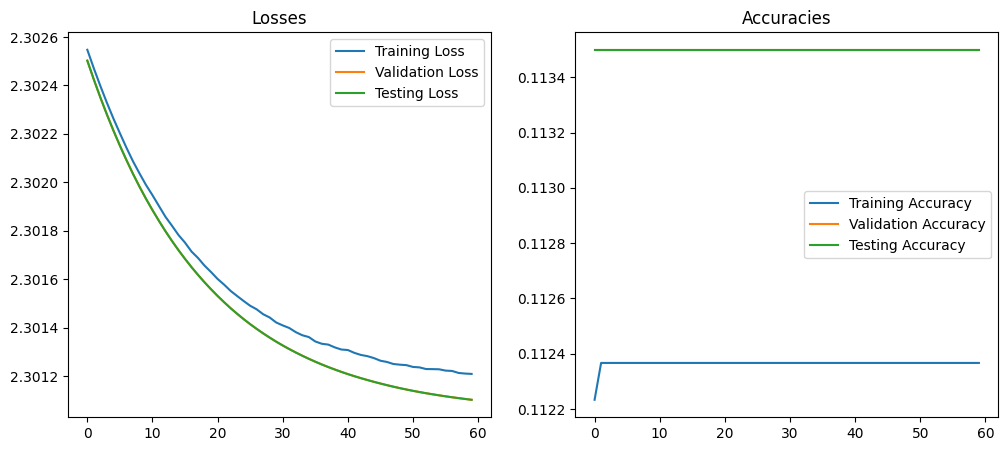

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
Activatio = Activation()
model = NeuralNetwork(activation=Activatio)

criterion = Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0003)

# Training loop
num_epochs = 60
train_losses, val_losses, test_losses = [], [], []
train_accuracies, val_accuracies, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    total_loss, correct_train = 0, 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_accuracy = correct_train / len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss, correct_val = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = correct_val / len(test_loader.dataset)

    # Testing
    model.eval()
    test_loss, correct_test = 0, 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_test += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_accuracy = correct_test / len(test_loader.dataset)

    # Store metrics for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, "
          f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}, Test Acc: {test_accuracy:.4f}")

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label='Testing Loss')
plt.legend()
plt.title('Losses')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.legend()
plt.title('Accuracies')

plt.show()


- Testing Loss and Validation Loss are the same, and hence are coinciding with each other in the graph
- Testing Accuracy and Validation Accuracy are the same, and hence are coinciding with each other in the graph


In [ ]:
print(train_losses)
print(val_losses)
print(test_losses)
print(train_accuracies)
print(val_accuracies)
print(test_accuracies)
